# 使用torchvision的數據集

In [1]:
import mlearn as mlearn
from mlearn import functional as F
from mlearn import layers
from mlearn.optimizers import SGD, RMSProp, Momentum
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
from mlearn.utils import DataLoader
from mlearn.utils import pre_F as P
import sys
from time import time
import pickle

# 加載數據集

In [2]:
train = datasets.FashionMNIST("datasets", train=True, download=True)

test = datasets.FashionMNIST("datasets", train=False, download=True)

pre = [P.normalize_MinMax]
# pre = [P.normalize]
# pre = []
trainset = DataLoader((train.data,train.targets),batch_size=32,shuffle=True,
                      preprocessing=pre)
testset = DataLoader((test.data, test.targets), batch_size=32, shuffle=True,
                    preprocessing=pre)

In [3]:
class Net(mlearn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.dense1 = layers.Dense(784,500)
        self.dense2 = layers.Dense(500,256)
        self.dense3 = layers.Dense(256,128)
        self.dense4 = layers.Dense(128, 64)
        self.dense5 = layers.Dense(64 , 10)
        
    def forward(self, inputs):
        o = self.dense1(inputs)
        o = F.relu(o)
        o = self.dense2(o)
        o = F.relu(o)
        o = self.dense3(o)
        o = F.relu(o)
        o = self.dense4(o)
        o = F.leaky_relu(o)
        o = self.dense5(o)
        o = F.leaky_relu(o)
        return o
net = Net()
hist = []

In [5]:
def fit(hist):
    optimizer = Momentum(net,0.01)
    EPOCHS = 20
    start = time()
    for epoch in range(EPOCHS):
        running_loss = 0.0
#         bar = " "*20
        for i, batch in enumerate(trainset, 0):
            features, labels = batch
            net.zero_grad()
            predict = net(features.reshape(-1,784))
            loss = F.cross_entropy(predict, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.data
#             print(f"\r{epoch+1}/{EPOCHS} Batch %-4d/1874  [{bar}] -> AVG Loss %.5f"%(i,running_loss/(i+1)), end="")
#             sys.stdout.flush()
        print(f"{epoch+1}/{EPOCHS}  [AVG Loss -> %.5f]"%(running_loss/(i+1)))
        hist.append(running_loss/(i+1))
    print(f"Finished in {time() - start}")
    print('trainning completed!')
fit(hist)

1/20  [AVG Loss -> 0.73248]
2/20  [AVG Loss -> 0.47027]
3/20  [AVG Loss -> 0.42391]
4/20  [AVG Loss -> 0.39511]
5/20  [AVG Loss -> 0.37393]
6/20  [AVG Loss -> 0.35706]
7/20  [AVG Loss -> 0.34256]
8/20  [AVG Loss -> 0.33013]
9/20  [AVG Loss -> 0.31886]
10/20  [AVG Loss -> 0.30870]
11/20  [AVG Loss -> 0.29952]
12/20  [AVG Loss -> 0.29088]
13/20  [AVG Loss -> 0.28273]
14/20  [AVG Loss -> 0.27510]
15/20  [AVG Loss -> 0.26800]
16/20  [AVG Loss -> 0.26095]
17/20  [AVG Loss -> 0.25467]
18/20  [AVG Loss -> 0.24849]
19/20  [AVG Loss -> 0.24256]
20/20  [AVG Loss -> 0.23666]
Finished in 324.4850492477417
trainning completed!


Accuracy 0.87450


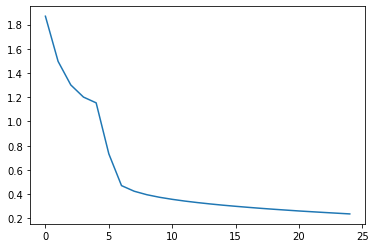

In [6]:
correct = 0
total = 0

for batch in testset:
    features, labels = batch
    o = net(features.reshape(-1,784))
    predict = []
    for x in o.data:
        predict.append(np.argmax(x))
    for b in predict == labels.data:
        if b:
            correct += 1
    total += 32
print("Accuracy %.5f"%(correct / total))

plt.plot(hist)
plt.show()